# 3 一般化線形モデル(GML) -- ポアソン回帰 --

## 3.2 観測されたデータの概要を調べる

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.core.indexing import is_label_like
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
d = pd.read_csv("./data/data3a.csv")
d

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
...,...,...,...
95,8,9.15,T
96,6,8.52,T
97,8,10.24,T
98,7,10.86,T


In [3]:
d.x

0      8.31
1      9.44
2      9.50
3      9.07
4     10.16
      ...  
95     9.15
96     8.52
97    10.24
98    10.86
99     9.97
Name: x, Length: 100, dtype: float64

In [4]:
d.y

0      6
1      6
2      6
3     12
4     10
      ..
95     8
96     6
97     8
98     7
99     9
Name: y, Length: 100, dtype: int64

In [5]:
d.f

0     C
1     C
2     C
3     C
4     C
     ..
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: object

In [6]:
type(d)

pandas.core.frame.DataFrame

In [7]:
print(d.y.dtype)
print(d.x.dtype)
print(d.f.dtype)

int64
float64
object


In [8]:
d.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [9]:
d.f.value_counts()

T    50
C    50
Name: f, dtype: int64

## 3.3 統計モデリングの前にデータを図示する

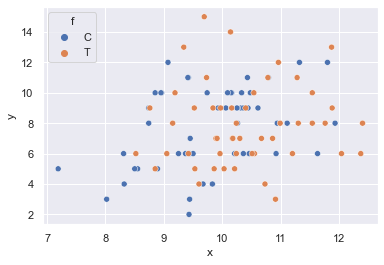

In [10]:
# 図3.2の描画
sns.scatterplot(x='x', y='y', hue='f', data=d)
# plt.legend()
plt.show()

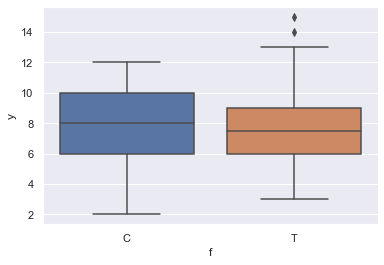

In [11]:
# 図3.3の描画
sns.boxplot(x=d.f, y=d.y, data=d)
plt.show()

### 3.4.1 線形予測子と対数リンク関数

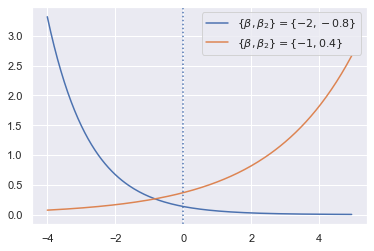

In [12]:
# 図3.4の描画
xi = np.arange(-4, 5, 0.05)
b1 = -2
b2 = -0.8
lam = np.exp(b1 + (b2 * xi))
plt.plot(xi, lam, label="$\{ \\beta, \\beta_2 \} = \{-2, -0.8 \}$")
b1 = -1
b2 = 0.4
lam = np.exp(b1 + (b2 * xi))
plt.plot(xi, lam, label="$\{ \\beta, \\beta_2 \} = \{-1, 0.4 \}$")
plt.axvline(0, ymax=1, ymin=0, ls=':')
plt.legend()
plt.show()

### 3.4.2 あてはめと当てはまりの良さ

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# statsmodelsによるglm
formula = "y ~ x"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
fit = model.fit()

In [14]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 08 Apr 2021   Deviance:                       84.993
Time:                        16:34:18   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

`Intercept` の `coef` がb1に、 `x` の `coef` がb2に相当  
`std err` はパラメータの標準誤差の推定値。この場合には推定値$\hat{\beta_1}$と$\hat{\beta_2}$ の「ばらつき」を標準誤差で表したもの。  


In [15]:
# 最大対数尤度を確認(log-likelihood)
fit.llf

-235.38625076986077

In [16]:
# 自由度（ただし切片は含めない）
fit.df_model

1

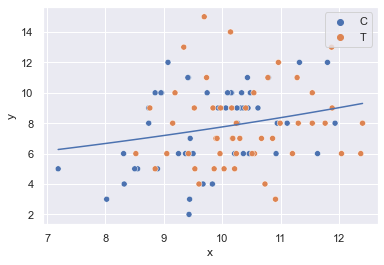

In [17]:
# 図3.7の描画
xx = np.linspace(d.x.min(), d.x.max(), 100)
lam = np.exp(fit.params['Intercept'] + fit.params['x'] * xx)
sns.scatterplot(x='x', y='y', hue='f', data=d)
sns.lineplot(x=xx, y=lam)
plt.show()

## 3.5 説明変数が因子型の統計モデル

In [18]:
formula = "y ~ f"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
fit_f = model.fit()

In [19]:
fit_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Thu, 08 Apr 2021   Deviance:                       89.475
Time:                        16:34:19   Pearson chi2:                     87.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [20]:
# 最大対数尤度を確認(log-likelihood)
fit_f.llf

-237.62725696068685

In [21]:
# 自由度（ただし切片は含めない）
fit_f.df_model

1

## 3.6 説明変数が数量型+因子型の統計モデル


In [22]:
formula = "y ~ x + f"
model = smf.glm(data=d,
                formula=formula,
                family=sm.families.Poisson())
fit_all = model.fit()

In [23]:
fit_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Thu, 08 Apr 2021   Deviance:                       84.808
Time:                        16:34:19   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [24]:
# 最大対数尤度
fit_all.llf

-235.29371924249367

In [25]:
# 自由度（ただし切片は含めない）
fit_all.df_model

2